In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wages.csv')

In [3]:
df.head()

,year,age,race,education,jobclass,health_ins,wage
0,2006,18,1. White,1. < HS Grad,1. Industrial,2. No,75.043154
1,2004,24,1. White,4. College Grad,2. Information,2. No,70.476020
2,2003,45,1. White,3. Some College,1. Industrial,1. Yes,130.982177
3,2003,43,3. Asian,4. College Grad,2. Information,1. Yes,154.685293
4,2005,50,1. White,2. HS Grad,2. Information,1. Yes,75.043154


## Data Scope Examination
 
**Data Source**: What is the data source ? (primary or secondary)
**Data Scope**: Is the data representing the whole target population or just a sample?

In [4]:
df.columns

Index(['year', 'age', 'race', 'education', 'jobclass', 'health_ins', 'wage'], dtype='object')

In [5]:
df['education'].value_counts()

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

In [6]:
df['jobclass'].value_counts()

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x15f4375f610>,
 'caps': [<matplotlib.lines.Line2D at 0x15f4375fc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f4375f340>],
 'medians': [<matplotlib.lines.Line2D at 0x15f43778190>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f43778460>],
 'means': []}

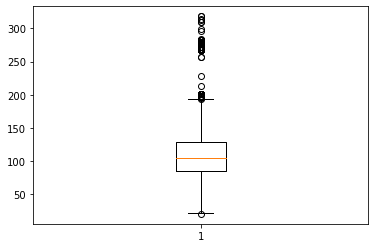

In [7]:
plt.boxplot(df['wage'])

Observation -> What is the unit of wage? Is it only for full-time jobs or part-time jobs or both? 

**Can we continue using this datasets?** **If not what options do we have?**

## Dataset Examination
What are the data types (qualitative or quantitative, structured or unstructured)? 

What are my expections and what are the reality? (age, race, education, job class)

In [9]:
df.head()

,year,age,race,education,jobclass,health_ins,wage
0,2006,18,1. White,1. < HS Grad,1. Industrial,2. No,75.043154
1,2004,24,1. White,4. College Grad,2. Information,2. No,70.476020
2,2003,45,1. White,3. Some College,1. Industrial,1. Yes,130.982177
3,2003,43,3. Asian,4. College Grad,2. Information,1. Yes,154.685293
4,2005,50,1. White,2. HS Grad,2. Information,1. Yes,75.043154


-> quantitative/numerical data/features:

-> qualitative/categorical data/features:

## Exploratory Analysis: Basic Statistics, Correlation among Features, Visualizations

In [11]:
df.describe()

,year,age,wage
count,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,111.703608
std,2.026167,11.542406,41.728595
min,2003.000000,18.000000,20.085537
25%,2004.000000,33.750000,85.383940
50%,2006.000000,42.000000,104.921507
75%,2008.000000,51.000000,128.680488
max,2009.000000,80.000000,318.342430


In [12]:
# observation for qualitative data
df.describe(exclude = np.number)

,race,education,jobclass,health_ins
count,3000,3000,3000,3000
unique,4,5,2,2
top,1. White,2. HS Grad,1. Industrial,1. Yes
freq,2480,971,1544,2083


**I am interested to see if I am competitive in this market--e.g., how many people have advanced degree?**

In [13]:
data = df['education'].value_counts()
data

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

<AxesSubplot:>

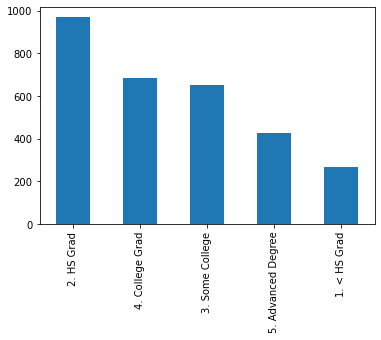

In [14]:
data.plot(kind = 'bar')

**This bar chart is our of order. So, what should we do do the better analysis?** 

-> Sort the order of index

<AxesSubplot:>

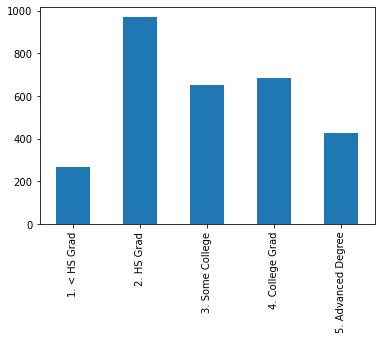

In [15]:
data.sort_index().plot(kind = "bar")

**What are the better ways to visualize it?**

<AxesSubplot:title={'center':'Distribution of Education Level in the Dataset'}, ylabel='education'>

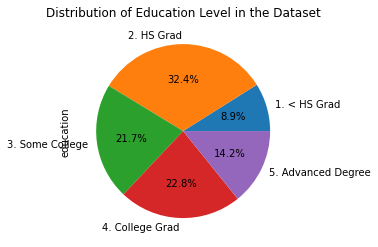

In [17]:
data.sort_index().plot(kind='pie', title="Distribution of Education Level in the Dataset", 
                                    legend=False, \
                                   autopct='%1.1f%%')

**Should I even come back to my hometown (Atlantic region) with my current degree?**

<AxesSubplot:xlabel='jobclass'>

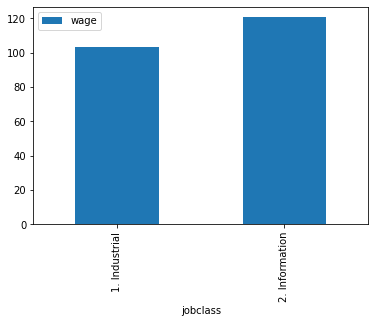

In [18]:
# get min value of each column to see which jobclass pays more
df[['wage', 'jobclass']].groupby('jobclass').mean().plot(kind = 'bar')

Which education level has the highest and lowest wage?

<AxesSubplot:xlabel='education'>

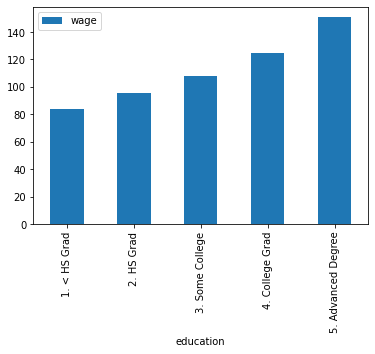

In [19]:
df[['wage', 'education']].groupby('education').mean().plot(kind = 'bar')

Advanced degree -> more wage

Does this still apply to my major (information class)

In [20]:
df['jobclass'].value_counts()

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

In [27]:
masked = df.apply(lambda x: x.jobclass == "2. Information", axis=1) # or
masked = df.apply(lambda x: x['jobclass'] == "2. Information", axis=1)

In [28]:
masked

0       False
1        True
2       False
3        True
4        True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [29]:
df_information = df[masked]

In [30]:
df_information = df[masked]
df_information

,year,age,race,education,jobclass,health_ins,wage
1,2004,24,1. White,4. College Grad,2. Information,2. No,70.476020
3,2003,43,3. Asian,4. College Grad,2. Information,1. Yes,154.685293
4,2005,50,1. White,2. HS Grad,2. Information,1. Yes,75.043154
5,2008,54,1. White,4. College Grad,2. Information,1. Yes,127.115744
7,2008,30,3. Asian,3. Some College,2. Information,1. Yes,111.720849
...,...,...,...,...,...,...,...
2987,2007,33,3. Asian,5. Advanced Degree,2. Information,1. Yes,167.981128
2988,2007,51,1. White,5. Advanced Degree,2. Information,1. Yes,126.085057
2989,2008,32,1. White,4. College Grad,2. Information,1. Yes,148.413159
2993,2006,31,1. White,2. HS Grad,2. Information,1. Yes,102.870247


In [32]:
df_information.shape

(1456, 7)

<AxesSubplot:xlabel='education'>

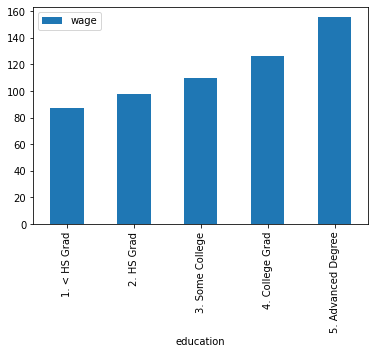

In [43]:
df_information[['education', 'wage']].groupby('education').mean().sort_index().plot(kind='bar')

Will my age be an issue?

<AxesSubplot:xlabel='age', ylabel='wage'>

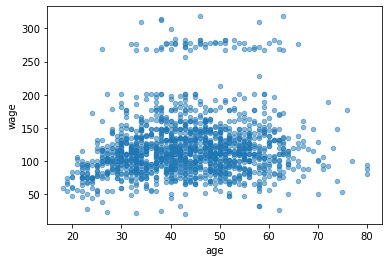

In [44]:
df_information[['wage', 'age']].plot(kind = 'scatter', x = 'age', y = 'wage', alpha = 0.5)

In [48]:
# map every degrees to seperate color
education2colors = {
    '1. < HS Grad': 'pink',
    '2. HS Grad': 'pink',
    '3. Some College': 'pink',
    '4. College Grad': 'pink',
    '5. Advanced Degree': 'red'
}
colors = df_information['education'].map(lambda x: education2colors[x])

In [49]:
df_information.apply(lambda x: education2colors[ x['education']], axis = 1)

1       pink
3       pink
4       pink
5       pink
7       pink
        ... 
2987     red
2988     red
2989    pink
2993    pink
2994    pink
Length: 1456, dtype: object

In [41]:
df_information.apply(lambda x: education2colors[x['education']], axis = 1)

1       blue
3       blue
4       blue
5       blue
7       blue
        ... 
2987     red
2988     red
2989    blue
2993    blue
2994    blue
Length: 1456, dtype: object

<AxesSubplot:title={'center':'Age v.s. Wage Distribution'}, xlabel='age', ylabel='wage'>

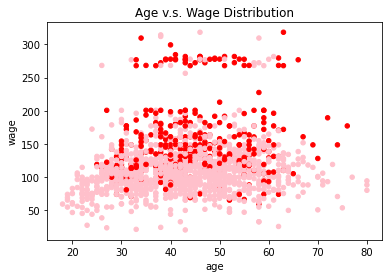

In [50]:
df_information[['age', 'wage']].plot(kind="scatter", title="Age v.s. Wage Distribution",
                                     x='age', y='wage', c=colors)

Based on race

In [51]:
df['race'].value_counts()

1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64

In [52]:
race2colors = {
    '1. White': 'grey',
    '2. Black': 'black',
    '3. Asian': 'yellow',
    '4. Other': 'blue',
}
colors = df_information['race'].map(lambda x: race2colors[x])

<AxesSubplot:title={'center':'Age v.s. Wage Distribution'}, xlabel='age', ylabel='wage'>

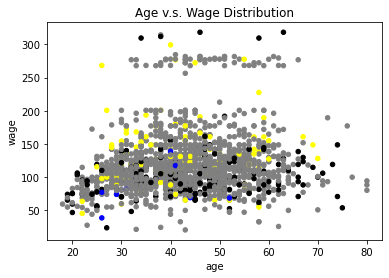

In [53]:
df_information[['age', 'wage']].plot(kind="scatter", title="Age v.s. Wage Distribution",
                                     x='age', y='wage', c=colors)

I can see some positivity in getting an advanced degree, but how much salary should I expect to increase if I get an advanced degree in my field?
Can I use a simple baseline to answer this question? what baseline should I use?

In [54]:
df_information[['education', 'wage']].groupby('education').mean()

,wage
education,
1. < HS Grad,87.502635
2. HS Grad,97.385793
3. Some College,109.382341
4. College Grad,126.586388
5. Advanced Degree,155.607374


Transform qualitative to quantitative data to figure out linear regression equation